# Population model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def upwind(J,T,n,u0,d,sigma):
    dx,dt = 1/J, T/n
    out = np.zeros((n+1,J))
    out[0,:] = [u0(k*dx) for k in range(0,J)]
    nu = dt/dx
    for i in range(n):
        out[i+1,0] = 0.0
        for k in range(1,J):
            out[i+1,k] = out[i,k]-nu*out[i,k]+nu*out[i,k-1]-dt*d(out[i,k],sigma)
    return out

In [54]:
def d1(n,sigma):
    return sigma*n

In [63]:
#exact solution to the model with d(n) = sigma*n
def n_sol(x,t,sigma,n0):
    return np.exp(-sigma*t)*n0(x-t)

In [68]:
def n0(a):
    return max(np.sin(0.5*np.pi*a),0.0)

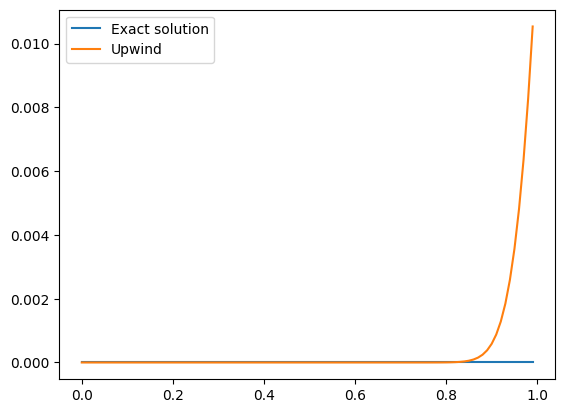

In [71]:
nu = 1.5
T = 1
J = 100
n = int(nu*T*J)
sigma = 1
x = 1/J*np.array(range(J))
n_ex = [n_sol(xk,T,1,n0) for xk in x]
u_pwd = upwind(J,T,n,n0,d1,sigma)
fig, ax = plt.subplots()
ax.plot(x,n_ex,label="Exact solution")
ax.plot(x,u_pwd[n-1],label="Upwind")
plt.legend()
plt.show()